<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

Libraries:

In [2]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

Loading data:


In [3]:
%pwd

'C:\\Users\\Roopa Mohan\\Desktop\\Desktop folders\\DV\\DEMD'

In [5]:
att= pd.read_csv('attrition.csv')

In [6]:
att.head()

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,Travel_Rarely,Sales,Life Sciences,2,Female,3,2,4,Single,5993,Yes,8,1,6,4,0,5,1
1,49,0,Travel_Frequently,Research & Development,Life Sciences,3,Male,2,2,2,Married,5130,No,10,3,10,7,1,7,8
2,37,1,Travel_Rarely,Research & Development,Other,4,Male,2,1,3,Single,2090,Yes,7,3,0,0,0,0,2
3,33,0,Travel_Frequently,Research & Development,Life Sciences,4,Female,3,1,3,Married,2909,Yes,8,3,8,7,3,0,3
4,27,0,Travel_Rarely,Research & Development,Medical,1,Male,3,1,2,Married,3468,No,6,3,2,2,2,2,2


In [7]:
att.describe(include='all')

,Age,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,OverTime,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
count,1470.000000,1470.000000,1470,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,3,3,6,NaN,2,NaN,NaN,NaN,3,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,Research & Development,Life Sciences,NaN,Male,NaN,NaN,NaN,Married,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,961,606,NaN,882,NaN,NaN,NaN,673,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,0.161224,NaN,NaN,NaN,2.721769,NaN,2.729932,2.063946,2.728571,NaN,6502.931293,NaN,11.279592,2.761224,7.008163,4.229252,2.187755,4.123129,9.192517
std,9.135373,0.367863,NaN,NaN,NaN,1.093082,NaN,0.711561,1.106940,1.102846,NaN,4707.956783,NaN,7.780782,0.706476,6.126525,3.623137,3.222430,3.568136,8.106864
min,18.000000,0.000000,NaN,NaN,NaN,1.000000,NaN,1.000000,1.000000,1.000000,NaN,1009.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,30.000000,0.000000,NaN,NaN,NaN,2.000000,NaN,2.000000,1.000000,2.000000,NaN,2911.000000,NaN,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,2.000000
50%,36.000000,0.000000,NaN,NaN,NaN,3.000000,NaN,3.000000,2.000000,3.000000,NaN,4919.000000,NaN,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,7.000000
75%,43.000000,0.000000,NaN,NaN,NaN,4.000000,NaN,3.000000,3.000000,4.000000,NaN,8379.000000,NaN,15.000000,3.000000,9.000000,7.000000,3.000000,7.000000,14.000000


In [8]:
att.shape

(1470, 20)

In [9]:
#creating a copy of the data
df = att.copy()

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome'],
      dtype='object')

In [11]:
#splitting categorical data
df_cat = df[['Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'OverTime',
        'WorkLifeBalance']]
df_cat.tail()

,Attrition,BusinessTravel,Department,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,OverTime,WorkLifeBalance
1465,0,Travel_Frequently,Research & Development,Medical,3,Male,4,2,4,Married,No,3
1466,0,Travel_Rarely,Research & Development,Medical,4,Male,2,3,1,Married,No,3
1467,0,Travel_Rarely,Research & Development,Life Sciences,2,Male,4,2,2,Married,Yes,3
1468,0,Travel_Frequently,Sales,Medical,4,Male,2,2,2,Married,No,2
1469,0,Travel_Rarely,Research & Development,Medical,2,Male,4,2,3,Married,No,4


In [12]:
#splitiing numerical data
df_num = df[['Age','Attrition','MonthlyIncome','TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome' ]]
df_num.head()

,Age,Attrition,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
0,41,1,5993,8,6,4,0,5,1
1,49,0,5130,10,10,7,1,7,8
2,37,1,2090,7,0,0,0,0,2
3,33,0,2909,8,8,7,3,0,3
4,27,0,3468,6,2,2,2,2,2


<ipython-input-13-646f744bc04a>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()


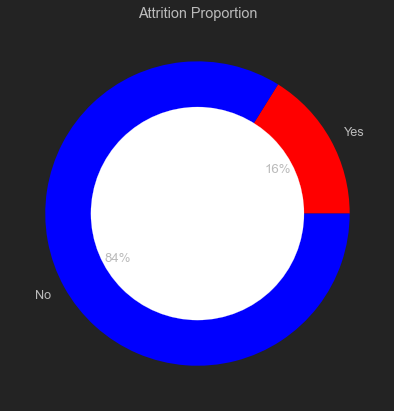

In [13]:
Y_count = len(df[df['Attrition'] == 1])
N_count = len(df[df['Attrition'] == 0])
# create data
names='Yes', 'No',
size=[Y_count,N_count]
 
# Create a circle for the center of the plot
circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['Red','Blue'],autopct='%1.0f%%')
p=plt.gcf()
p.gca().add_artist(circle)
ax = plt.axes()
ax.set_title("Attrition Proportion")
plt.show() 

In [14]:
df_num['Attrition'].min()

0

Graphs for Attrition:
Total_no. of categories:2


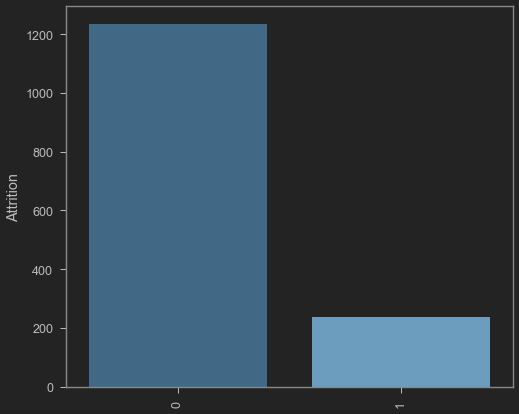

Graphs for EnvironmentSatisfaction:
Total_no. of categories:4


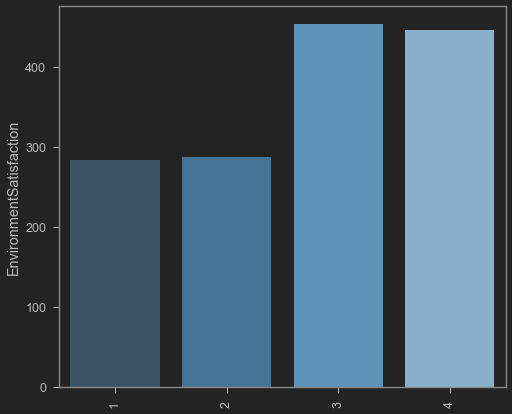

Graphs for JobInvolvement:
Total_no. of categories:4


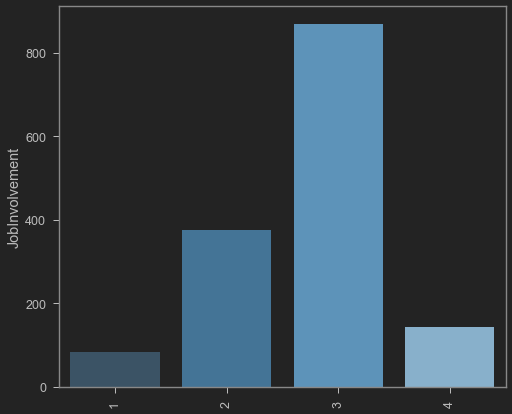

Graphs for JobLevel:
Total_no. of categories:5


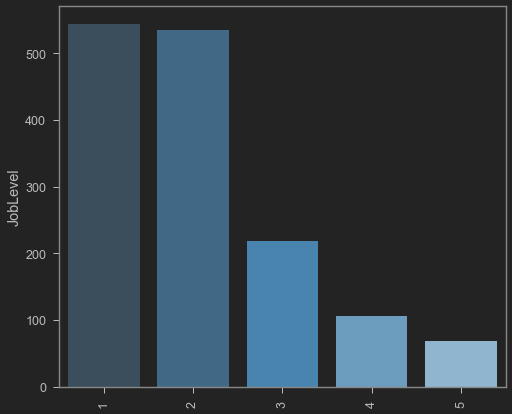

Graphs for JobSatisfaction:
Total_no. of categories:4


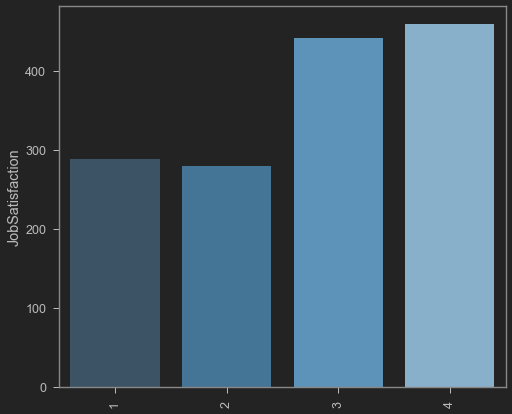

Graphs for WorkLifeBalance:
Total_no. of categories:4


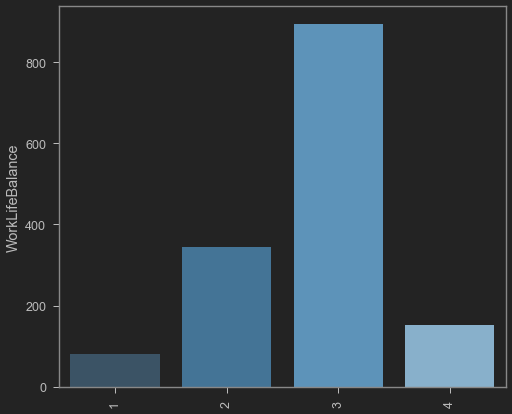

Graphs for BusinessTravel_Non-Travel:
Total_no. of categories:2


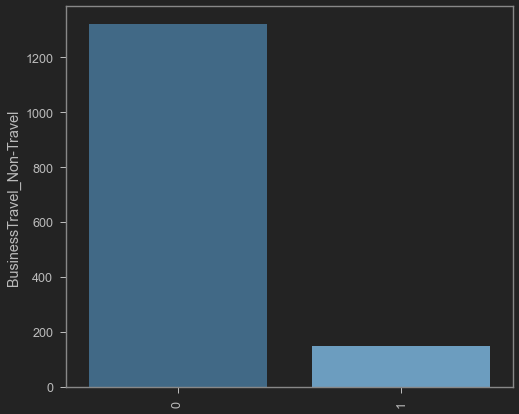

Graphs for BusinessTravel_Travel_Frequently:
Total_no. of categories:2


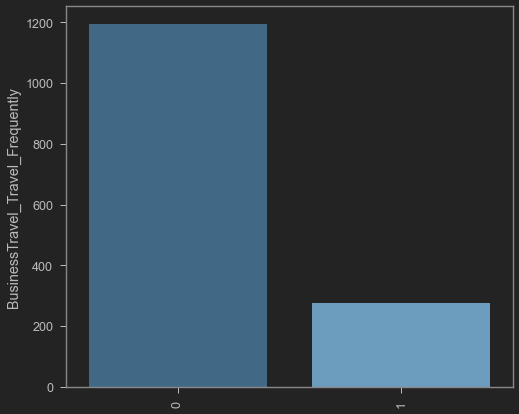

Graphs for BusinessTravel_Travel_Rarely:
Total_no. of categories:2


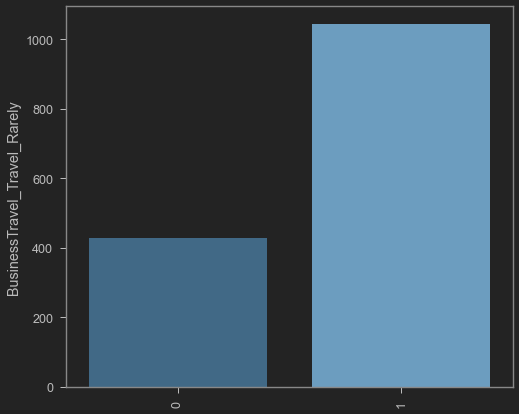

Graphs for Department_Human Resources:
Total_no. of categories:2


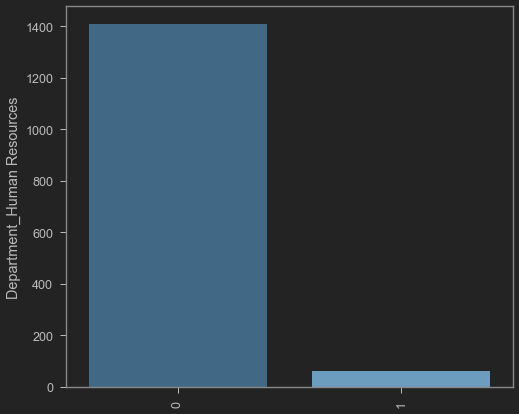

Graphs for Department_Research & Development:
Total_no. of categories:2


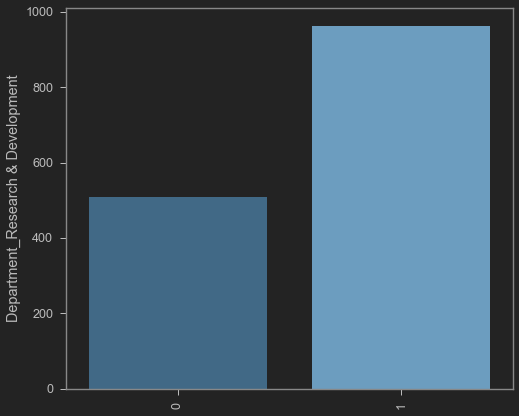

Graphs for Department_Sales:
Total_no. of categories:2


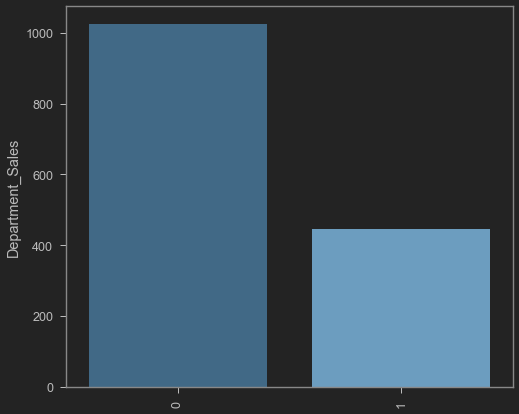

Graphs for EducationField_Human Resources:
Total_no. of categories:2


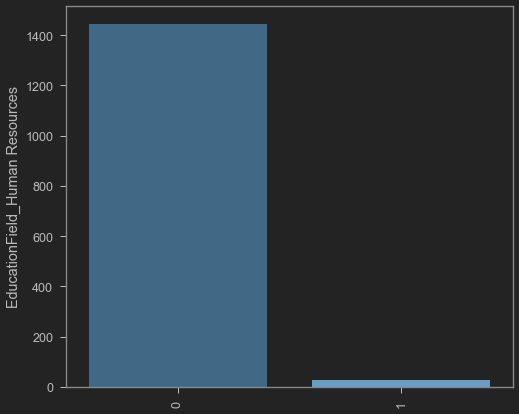

Graphs for EducationField_Life Sciences:
Total_no. of categories:2


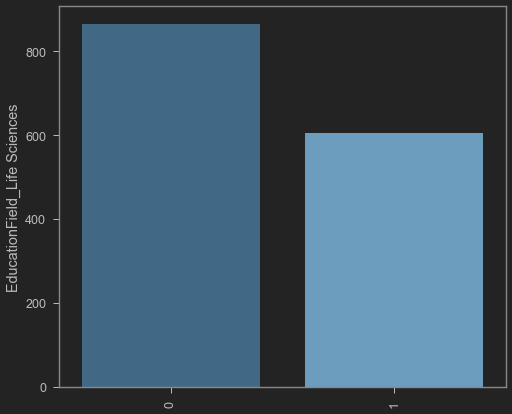

Graphs for EducationField_Marketing:
Total_no. of categories:2


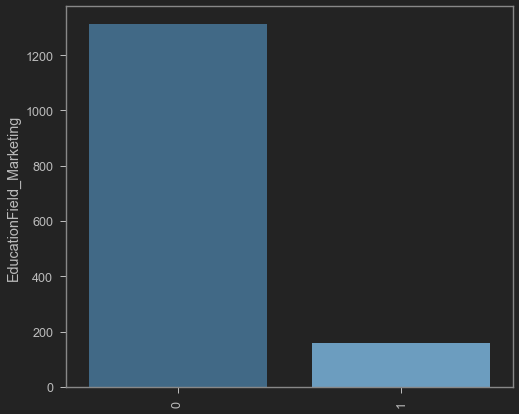

Graphs for EducationField_Medical:
Total_no. of categories:2


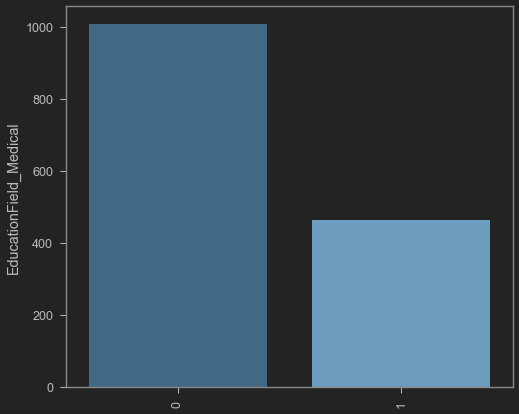

Graphs for EducationField_Other:
Total_no. of categories:2


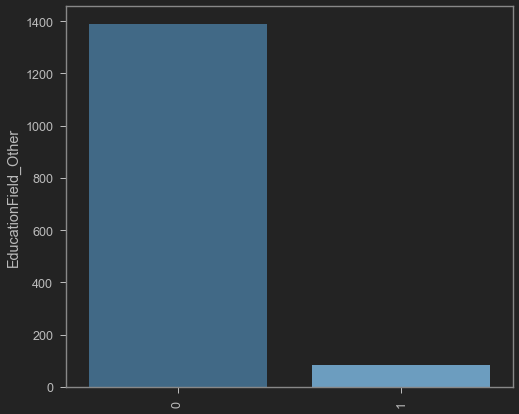

Graphs for EducationField_Technical Degree:
Total_no. of categories:2


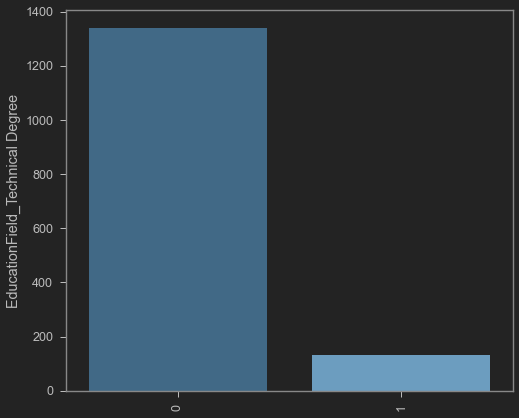

Graphs for Gender_Female:
Total_no. of categories:2


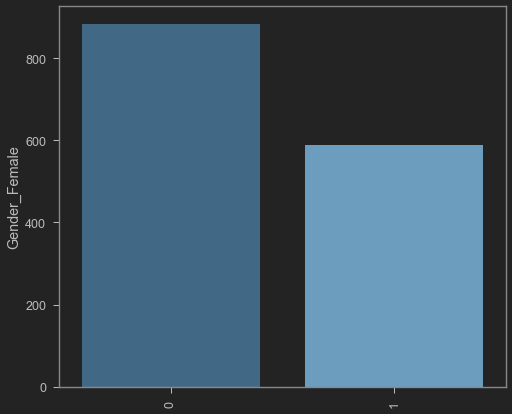

Graphs for Gender_Male:
Total_no. of categories:2


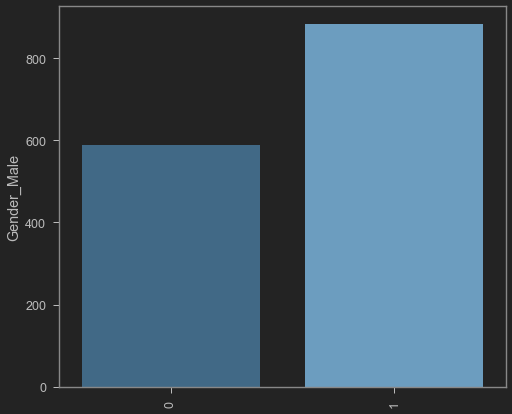

Graphs for MaritalStatus_Divorced:
Total_no. of categories:2


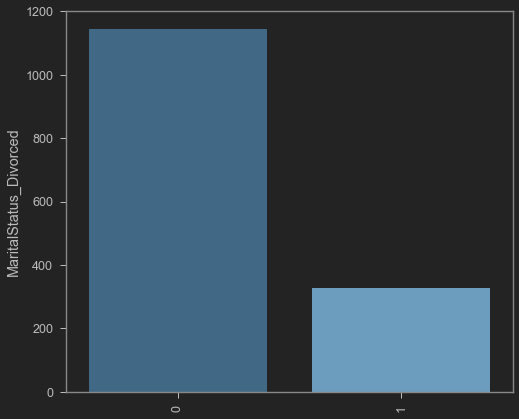

Graphs for MaritalStatus_Married:
Total_no. of categories:2


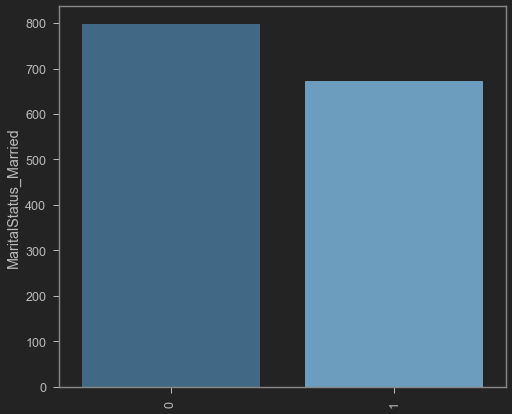

Graphs for MaritalStatus_Single:
Total_no. of categories:2


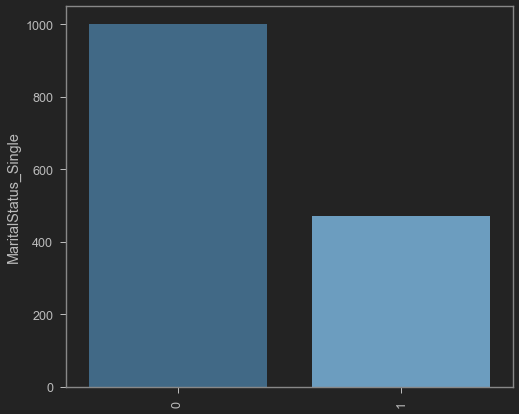

Graphs for OverTime_No:
Total_no. of categories:2


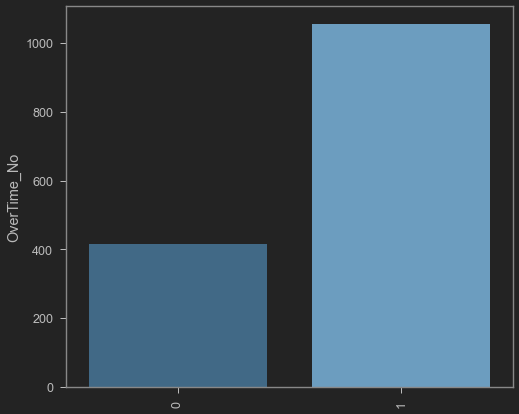

Graphs for OverTime_Yes:
Total_no. of categories:2


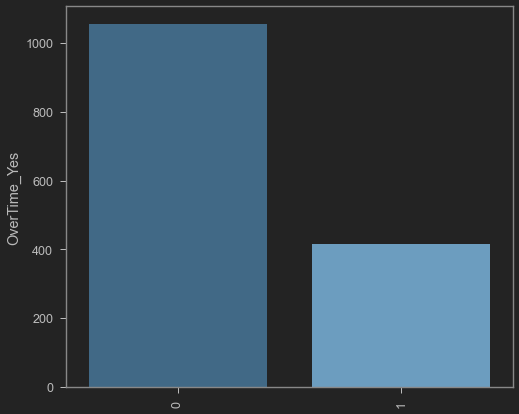

In [32]:
#Categorical variables - count

for i in df_cat:
    cat_num = df_cat[i].value_counts()
    print("Graphs for %s:\nTotal_no. of categories:%d" %(i, len(cat_num)))
    chart = sns.barplot(x= cat_num.index, y= cat_num , palette="Blues_d")
    chart.set_xticklabels(chart.get_xticklabels(),rotation = 90)
    plt.show()

In [33]:
#correlation matrix - numerical data
correlation_matrix = df_num.corr()
correlation_matrix.to_csv("Correlation_mat-Attrition.csv")
correlation_matrix

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome
Age,1.000000,0.497855,0.680381,0.311309,0.212901,0.216513,0.202089,-0.001686
MonthlyIncome,0.497855,1.000000,0.772893,0.514285,0.363818,0.344978,0.344079,-0.017014
TotalWorkingYears,0.680381,0.772893,1.000000,0.628133,0.460365,0.404858,0.459188,0.004628
YearsAtCompany,0.311309,0.514285,0.628133,1.000000,0.758754,0.618409,0.769212,0.009508
YearsInCurrentRole,0.212901,0.363818,0.460365,0.758754,1.000000,0.548056,0.714365,0.018845
YearsSinceLastPromotion,0.216513,0.344978,0.404858,0.618409,0.548056,1.000000,0.510224,0.010029
YearsWithCurrManager,0.202089,0.344079,0.459188,0.769212,0.714365,0.510224,1.000000,0.014406
DistanceFromHome,-0.001686,-0.017014,0.004628,0.009508,0.018845,0.010029,0.014406,1.000000


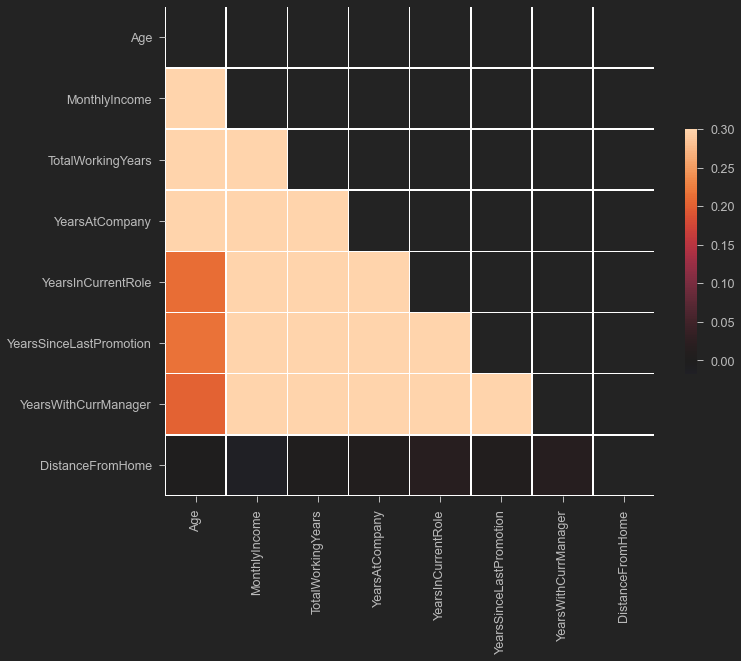

In [34]:
#correlation plot - numerical data
# plt.figure(figsize= (10,10), dpi=100)
# sns.heatmap(df_num.corr(), annot= True ,fmt='0.1g', vmin= -1 , vmax= 1, center=0)
# plt.savefig("Correlation -Attrition")


# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(df_num.corr(), dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df_num.corr(), mask=mask, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [51]:
#removing att from numerical
df_num = df_num.drop(["Attrition"], axis=1)
df_num.head()

KeyError: "['Attrition'] not found in axis"

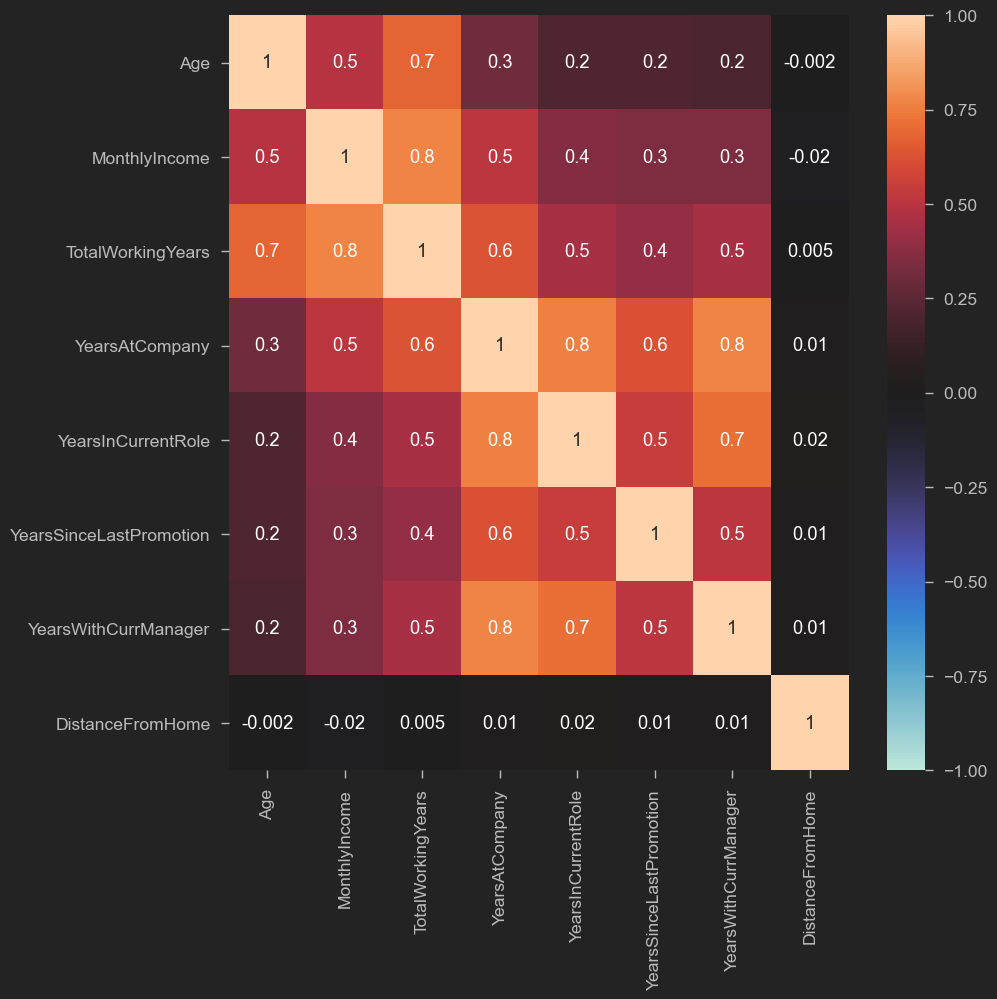

In [20]:
#checking for strong correlation btwn each numerical variables
plt.figure(figsize= (10,10), dpi=100)
sns.heatmap(df_num.corr(), annot= True ,fmt='0.1g', vmin= -1 , vmax= 1, center=0)
plt.savefig("Numerical_correlation-Attrition")

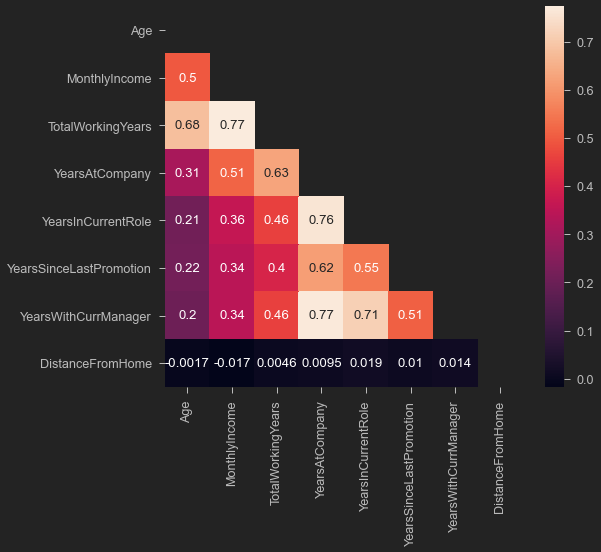

In [21]:
matrix = np.triu(df_num.corr())
sns.heatmap(df_num.corr(), annot=True, mask=matrix)

In [22]:
#changing all catg to num
df_cat = pd.get_dummies(df_cat)
df_cat.head()

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,1,2,3,2,4,1,0,0,1,0,...,0,0,0,1,0,0,0,1,0,1
1,0,3,2,2,2,3,0,1,0,0,...,0,0,0,0,1,0,1,0,1,0
2,1,4,2,1,3,3,0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
3,0,4,3,1,3,3,0,1,0,0,...,0,0,0,1,0,0,1,0,0,1
4,0,1,3,1,2,3,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0


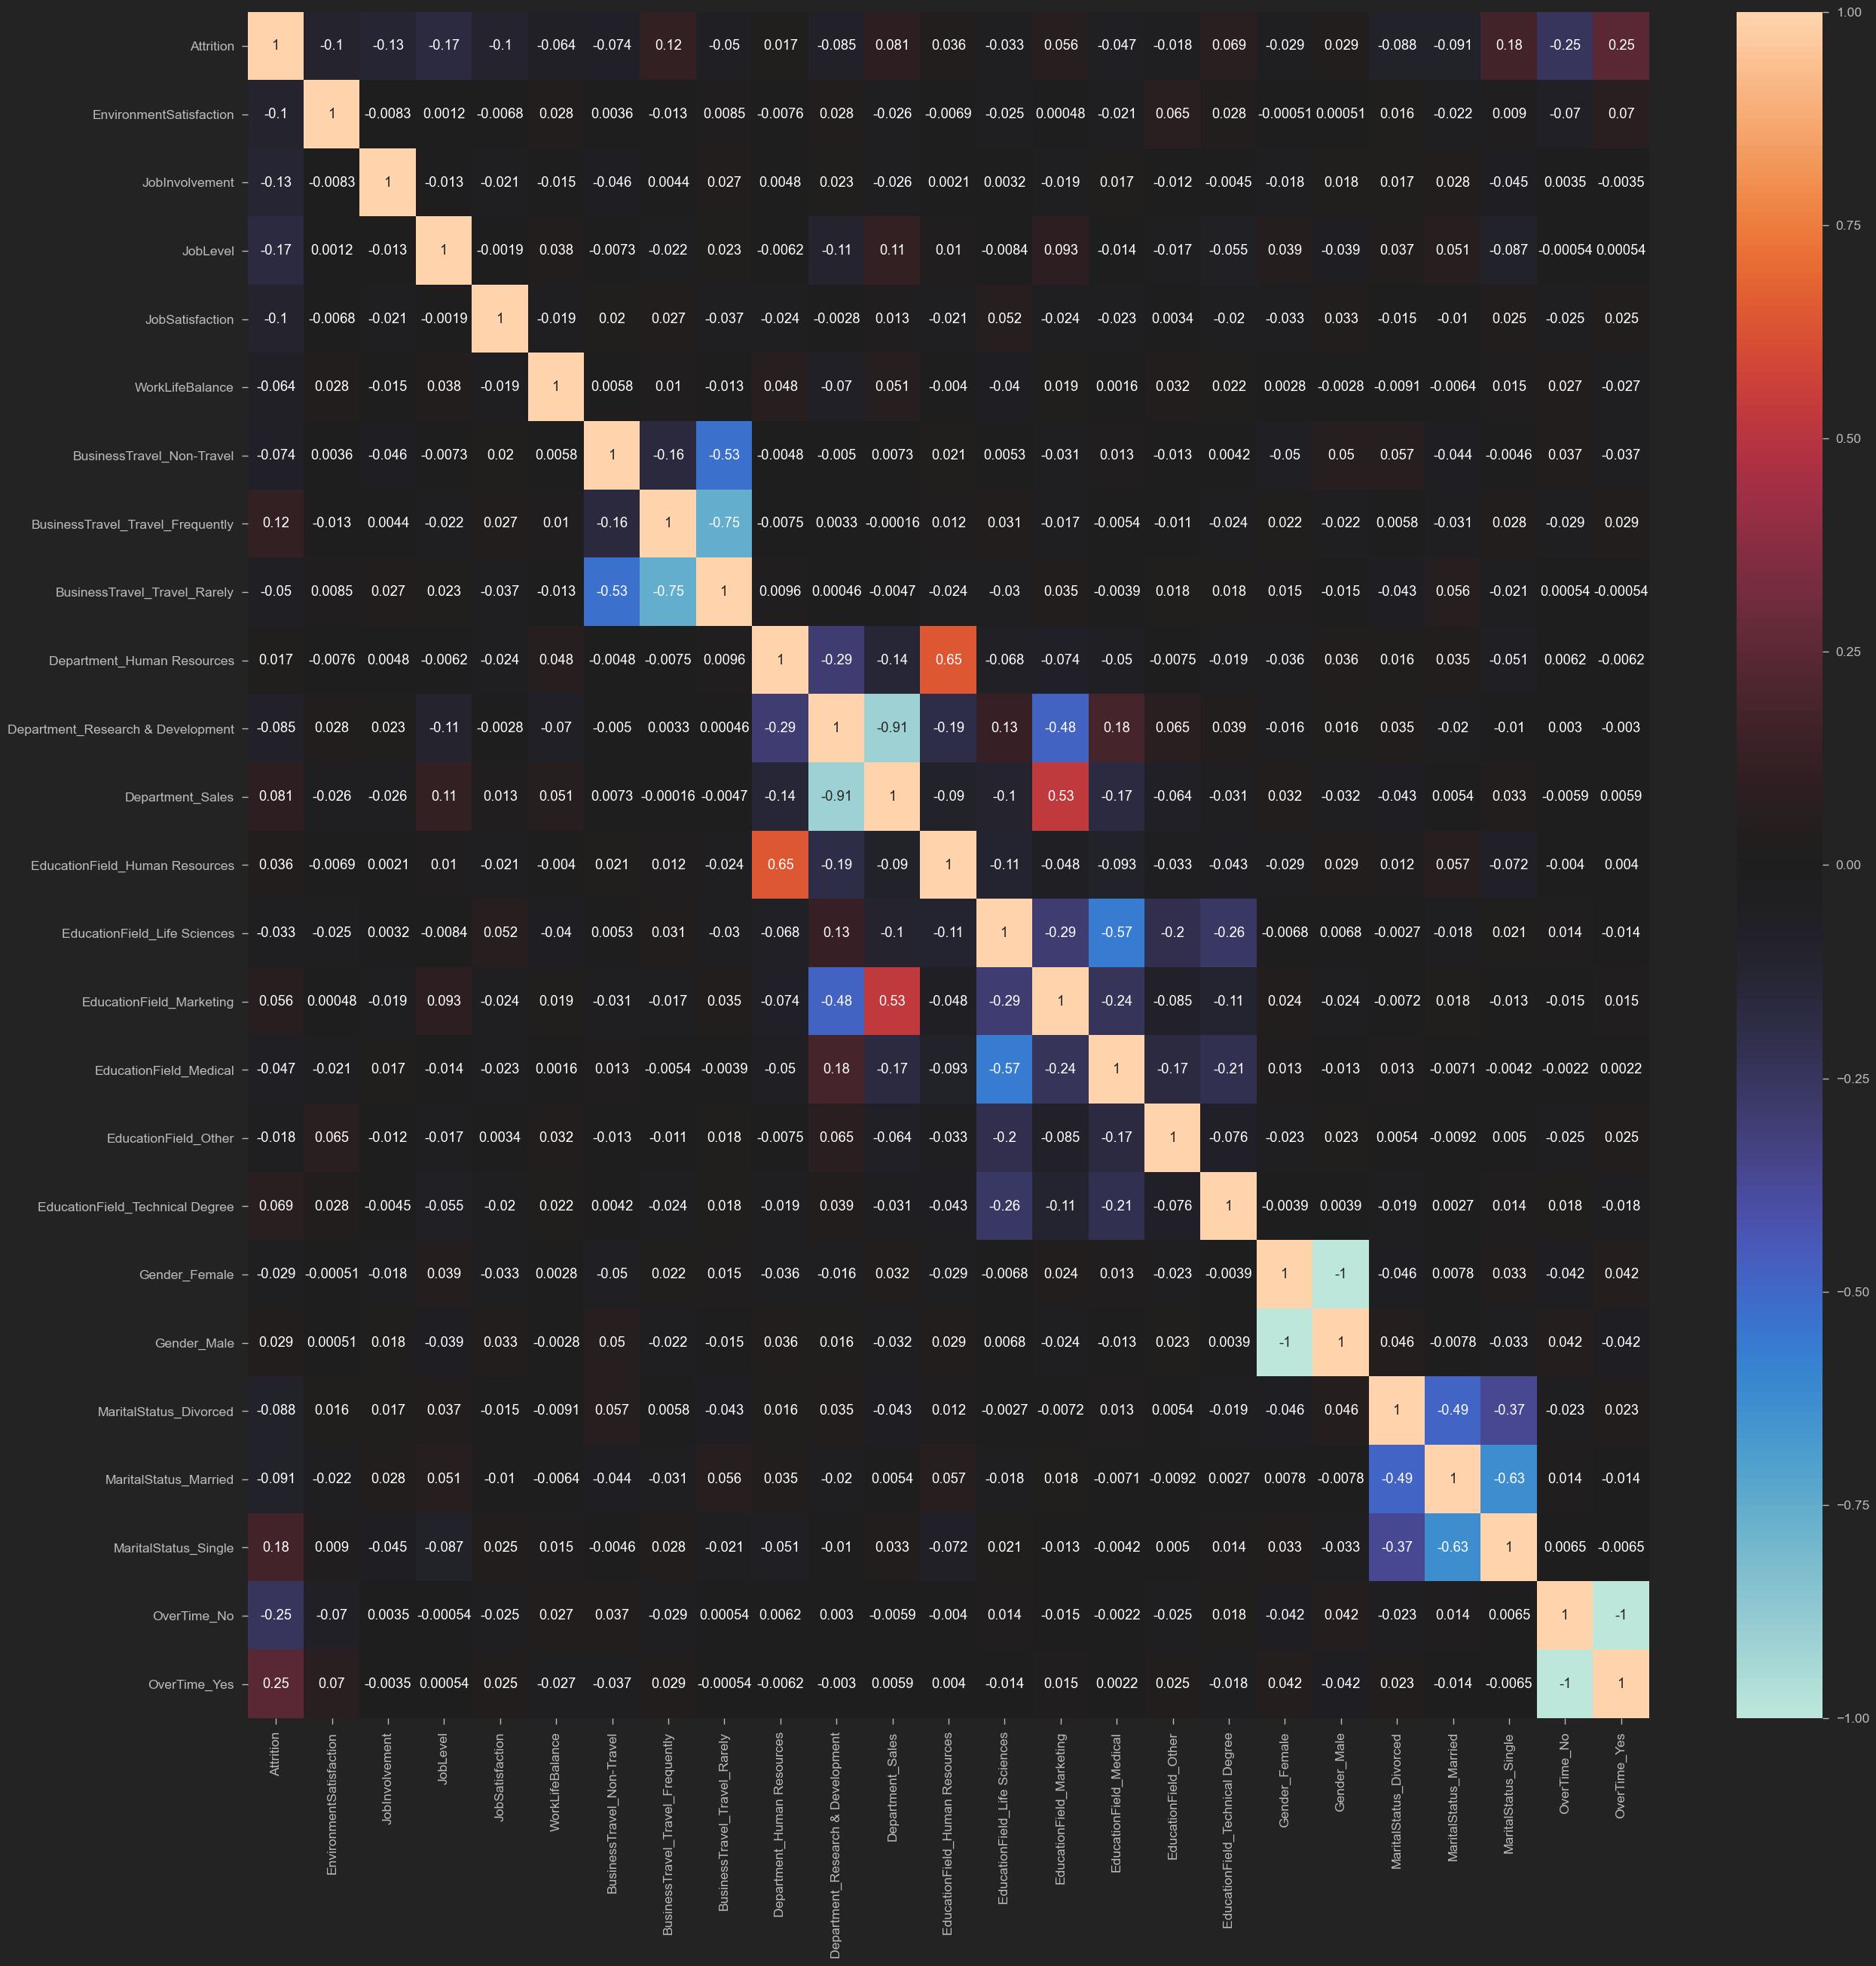

In [23]:
plt.figure(figsize= (30,30), dpi=100)
sns.heatmap(df_cat.corr(), annot= True, vmin= -1 , vmax= 1, center=0)
plt.savefig("Categorical_associations-Attrition")

In [24]:
#categorical association -csv
cat_association = df_cat.corr()
cat_association.to_csv("Categorical_associations-Attrition.csv")
cat_association

,Attrition,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,WorkLifeBalance,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
Attrition,1.000000,-0.103369,-0.130016,-0.169105,-0.103481,-0.063939,-0.074457,0.115143,-0.049538,0.016832,...,-0.046999,-0.017898,0.069355,-0.029453,0.029453,-0.087716,-0.090984,0.175419,-0.246118,0.246118
EnvironmentSatisfaction,-0.103369,1.000000,-0.008278,0.001212,-0.006784,0.027627,0.003568,-0.012624,0.008496,-0.007597,...,-0.021299,0.064602,0.027713,-0.000508,0.000508,0.016439,-0.022180,0.009035,-0.070132,0.070132
JobInvolvement,-0.130016,-0.008278,1.000000,-0.012630,-0.021476,-0.014617,-0.045779,0.004424,0.026714,0.004789,...,0.017103,-0.011895,-0.004519,-0.017960,0.017960,0.016815,0.028324,-0.045253,0.003507,-0.003507
JobLevel,-0.169105,0.001212,-0.012630,1.000000,-0.001944,0.037818,-0.007295,-0.021557,0.023433,-0.006157,...,-0.014114,-0.016724,-0.054707,0.039403,-0.039403,0.037087,0.050547,-0.087072,-0.000544,0.000544
JobSatisfaction,-0.103481,-0.006784,-0.021476,-0.001944,1.000000,-0.019459,0.019802,0.027117,-0.036562,-0.024068,...,-0.022645,0.003380,-0.019795,-0.033252,0.033252,-0.015197,-0.010315,0.024571,-0.024539,0.024539
WorkLifeBalance,-0.063939,0.027627,-0.014617,0.037818,-0.019459,1.000000,0.005780,0.010199,-0.012640,0.047763,...,0.001641,0.031812,0.021962,0.002753,-0.002753,-0.009080,-0.006388,0.014921,0.027092,-0.027092
BusinessTravel_Non-Travel,-0.074457,0.003568,-0.045779,-0.007295,0.019802,0.005780,1.000000,-0.162435,-0.526850,-0.004755,...,0.012828,-0.013389,0.004171,-0.050461,0.050461,0.057455,-0.043635,-0.004622,0.037163,-0.037163
BusinessTravel_Travel_Frequently,0.115143,-0.012624,0.004424,-0.021557,0.027117,0.010199,-0.162435,1.000000,-0.753092,-0.007485,...,-0.005367,-0.011004,-0.023569,0.022015,-0.022015,0.005779,-0.030785,0.027734,-0.029392,0.029392
BusinessTravel_Travel_Rarely,-0.049538,0.008496,0.026714,0.023433,-0.036562,-0.012640,-0.526850,-0.753092,1.000000,0.009618,...,-0.003930,0.018406,0.017521,0.014682,-0.014682,-0.043287,0.055613,-0.020808,0.000539,-0.000539
Department_Human Resources,0.016832,-0.007597,0.004789,-0.006157,-0.024068,0.047763,-0.004755,-0.007485,0.009618,1.000000,...,-0.049761,-0.007527,-0.019469,-0.035652,0.035652,0.016037,0.034767,-0.051443,0.006178,-0.006178


In [25]:
#concat two df
df_final = pd.concat([df_num,df_cat], axis=1)
df_final.head()

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DistanceFromHome,Attrition,EnvironmentSatisfaction,...,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Gender_Female,Gender_Male,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,5993,8,6,4,0,5,1,1,2,...,0,0,0,1,0,0,0,1,0,1
1,49,5130,10,10,7,1,7,8,0,3,...,0,0,0,0,1,0,1,0,1,0
2,37,2090,7,0,0,0,0,2,1,4,...,0,1,0,0,1,0,0,1,0,1
3,33,2909,8,8,7,3,0,3,0,4,...,0,0,0,1,0,0,1,0,0,1
4,27,3468,6,2,2,2,2,2,0,1,...,1,0,0,0,1,0,1,0,1,0


In [26]:
df_final.columns

Index(['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome', 'Attrition', 'EnvironmentSatisfaction',
       'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'WorkLifeBalance',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'EducationField_Technical Degree',
       'Gender_Female', 'Gender_Male', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'OverTime_No',
       'OverTime_Yes'],
      dtype='object')

In [27]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1320 sha256=857f405f504176e6b93aba66453dcf6dfdbdbdd815ae82ff1ccfe60874392699
  Stored in directory: c:\users\roopa mohan\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


You should consider upgrading via the 'c:\users\roopa mohan\anaconda3\python.exe -m pip install --upgrade pip' command.


In [36]:
#RndmForest algorithm
#splitting the data to train and test
from sklearn.model_selection import train_test_split

target = df_final["Attrition"]
features = df_final.drop("Attrition",axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.4,random_state=10)


In [29]:
#RFclassifier - training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [30]:
#Accuracy test
from sklearn.metrics import accuracy_score

test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)*100

85.20408163265306

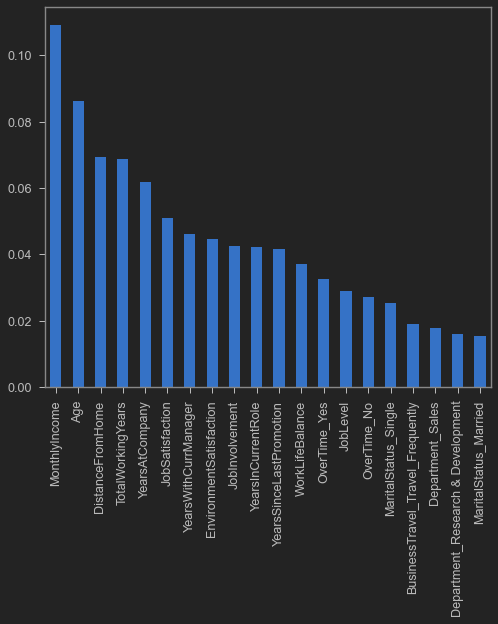

<Figure size 576x504 with 0 Axes>

In [31]:
#Importance features which contibute to attrition are

feat_importances = pd.Series(model.feature_importances_,index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind ='bar')
plt.show()
plt.savefig("ML-attrition")

In [45]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'OverTime',
       'TotalWorkingYears', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'DistanceFromHome'],
      dtype='object')

In [61]:
df_final_num = df[['Age','MonthlyIncome','TotalWorkingYears',
                      'YearsAtCompany','YearsWithCurrManager','DistanceFromHome',
                       'Attrition']]

In [59]:
df_dummy = df[['Gender','Department','EnvironmentSatisfaction']]
df_encode = pd.get_dummies(df_dummy)
df_encode.head(5)

,EnvironmentSatisfaction,Gender_Female,Gender_Male,Department_Human Resources,Department_Research & Development,Department_Sales
0,2,1,0,0,0,1
1,3,0,1,0,1,0
2,4,0,1,0,1,0
3,4,1,0,0,1,0
4,1,0,1,0,1,0


In [64]:
df_final = pd.concat([df_final_num,df_encode])
df_final.head(5)

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,DistanceFromHome,Attrition,EnvironmentSatisfaction,Gender_Female,Gender_Male,Department_Human Resources,Department_Research & Development,Department_Sales
0,41.0,5993.0,8.0,6.0,5.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
1,49.0,5130.0,10.0,10.0,7.0,8.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,37.0,2090.0,7.0,0.0,0.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN
3,33.0,2909.0,8.0,8.0,0.0,3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,27.0,3468.0,6.0,2.0,2.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
X = df_final.drop(["Attrition"], axis=1)
y = df_final["Attrition"]

In [71]:
#RndmForest algorithm
#splitting the data to train and test
from sklearn.model_selection import train_test_split

target = df_final_num_cat["Attrition"]
features = df_final_num_cat.drop("Attrition",axis=1)

X_train, X_test, y_train, y_test = train_test_split(features,target,test_size=0.4,random_state=10)

In [72]:
#RFclassifier - training
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
#Accuracy test
from sklearn.metrics import accuracy_score

test_pred = model.predict(X_test)
accuracy_score(y_test, test_pred)*100

81.97278911564626

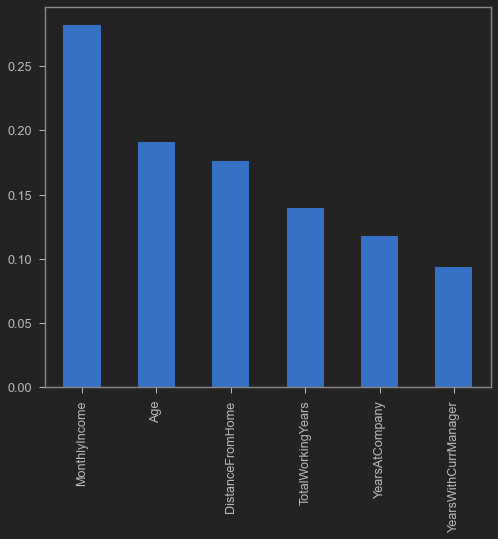

<Figure size 576x504 with 0 Axes>

In [74]:
#Importance features which contibute to attrition are

feat_importances = pd.Series(model.feature_importances_,index=features.columns)
feat_importances = feat_importances.nlargest(20)
feat_importances.plot(kind ='bar')
plt.show()
plt.savefig("ML-attrition")

## PICKLE FILE

In [75]:
import pickle

pkl_file = open("Attrition.pkl", "wb")

In [76]:
pickle.dump(model, pkl_file)

In [77]:
pkl_file.close()

In [80]:
y_test = pd.Series(y_test, name='Attrition')
test_df = pd.concat([X_test,y_test],axis=1)
test_df

,Age,MonthlyIncome,TotalWorkingYears,YearsAtCompany,YearsWithCurrManager,DistanceFromHome,Attrition
793,28,2207,4,4,2,15,0
689,20,2973,1,1,0,4,1
1254,49,4507,8,5,4,11,0
233,50,19517,32,7,6,1,0
1403,39,13341,21,20,10,15,0
...,...,...,...,...,...,...,...
871,24,2210,1,1,0,17,1
1045,40,2345,8,3,2,2,0
101,32,2956,1,1,0,1,0
1008,54,17328,29,20,7,1,0


In [81]:
test_df.to_csv("test_dataset.csv",index=False)